# Exploration and Visualization of Prosper loans

## Patrick Ojunde

<!-- ## Preliminary Wrangling
 -->
## Table of Contents
<ul>
<li><a href="#introduce">Introduction</a></li>
<li><a href="#obj">Objective</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#uni">Univariate exploration</a></li>
<li><a href="#bi">Bivariate exploration</a></li> 
<li><a href="#multi">Multivariate exploration</a></li>
<li><a href="#insights">General Summary & Insights</a></li>  
<li><a href="#conclude">Conclusion & Limtations</a></li>
</ul>

<a id='introduce'></a>

### Introduction

> The dataset is composed of  113,937 rows (uniquely idenifying a loan) and 81 variables that describes each loan some of which includes loan amount, borrower rate (or interest rate), current loan status, and borrower income.

> More information about this dataset can be found here: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0


<a id='obj'></a>
    
### Objective
    
> The objective of this analysis and visualization activity is to come up with interesting and actionable insghts from the loan data

> We also want to identify what featrues are suitable for predicting the success of a loan application

>> Importing required libraries

In [276]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<!-- > Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section. -->

In [277]:
df_main = pd.read_csv('prosperLoanData.csv')

In [278]:
df_main.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


<!-- ### What is the structure of your dataset? -->

### Exlpore qualitative and quantitive features of datasets

In [279]:
rows= df_main.shape[0]
columns = df_main.shape[1]
print(f'No of Rows: {rows}\nNo of Columns: {columns}')

No of Rows: 113937
No of Columns: 81


> Let us firstly have a look at our columns and determine which ones ware suitable for the objective of this analysis

In [280]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Not all the data features are useful for our analysis, so we would work with the following `22 features`

### Useful Features for Predicting Outcome of a Loan Success

- Loan Term 

- Loan Status 

- Estimated Effective Yield 

- Borrower APR

- Borrower (Loan) Rate 

- Prosper (Credit) Rating (numeric)

- Prosper (Credit) Rating (Alpha)

- Prosper (Credit) Score    

- Listing Category (numeric)

- EmploymentStatus

- Occupation

- Employment Status Duration

- Is Borrower Homeowner ? 

- Verifiable Income 

- Stated Monthly Income

- Monthly Loan Payment

- Recommendations

- Debt-to-Income-Ratio

- Loan Original Amount

- Income Range

- Investors

- Borrower State

In [281]:
features_to_use = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

> select the useful columns from the main dataframe

In [282]:
df_loan = df_main[features_to_use]
df_loan.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
0,36,Completed,NaN,0.16516,0.1580,NaN,NaN,NaN,0,Self-employed,...,True,3083.333333,330.43,0,0.17,9425,1.0,"$25,000-49,999",258,CO
1,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
2,36,Completed,NaN,0.28269,0.2750,NaN,NaN,NaN,0,Not available,...,True,2083.333333,123.32,0,0.06,3001,1.0,Not displayed,41,GA
3,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
4,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN


> Let perform some assement of the selcted features

In [283]:
rows = df_loan.shape[0]
cols= df_loan.shape[1]
print(f'New Row Size: {rows}\nNew Column Size {cols}')

New Row Size: 113937
New Column Size 23


In [284]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   EstimatedEffectiveYield    84853 non-null   float64
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (numeric)    84853 non-null   float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  IncomeVerifiable           11

In [285]:
df_loan.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,113937.000000,84853.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.168661,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,5.608026e+03,272.475783,0.048027,0.275947,8337.01385,0.998584,80.475228
std,10.436212,0.068467,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,7.478497e+03,192.697812,0.332353,0.551759,6245.80058,0.017919,103.239020
min,12.000000,-0.182700,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,36.000000,0.115670,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,3.200333e+03,131.620000,0.000000,0.140000,4000.00000,1.000000,2.000000
50%,36.000000,0.161500,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,4.666667e+03,217.740000,0.000000,0.220000,6500.00000,1.000000,44.000000
75%,36.000000,0.224300,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,6.825000e+03,371.580000,0.000000,0.320000,12000.00000,1.000000,115.000000
max,60.000000,0.319900,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.00000,1.012500,1189.000000


In [286]:
df_loan.isnull().sum()

Term                             0
LoanStatus                       0
EstimatedEffectiveYield      29084
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (numeric)      29084
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
EmploymentStatus              2255
Occupation                    3588
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
IncomeVerifiable                 0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
Recommendations                  0
DebtToIncomeRatio             8554
LoanOriginalAmount               0
PercentFunded                    0
IncomeRange                      0
Investors                        0
BorrowerState                 5515
dtype: int64

.

<a id= 'wrangle'></a>
### Data Wrangling

Define 
>There are  null values in our datasets

Code

In [287]:
df_loan = df_loan.dropna()

Test

> Test there are no more null values
>> If there are no more null values, the code below should output zero

In [288]:
df_loan.isnull().all().sum()

0

> Now let's check if our dataset contain deuplicate values
>> If there are no duplicates, the code below should output zero

In [289]:
df_loan.duplicated().sum()

0

Define
> There is inappropriate naming of some of the features, we would have to rename them 

Code

In [290]:
columns_to_rename ={'ProsperRating (Alpha)': 'prosperAlphaRating', 
                        'ProsperRating (numeric)': 'prosperNumericRating',
                        'ListingCategory (numeric)' : 'listingCategoryNumeric'
                       }

In [291]:
df_loan = df_loan.rename(columns=columns_to_rename)

Test

In [292]:
old_cols = ['ProsperRating (Alpha)','ProsperRating (numeric)','ListingCategory (numeric)']
for i in old_cols:
    assert i not in df_loan.columns.to_list()
    print(i + 'does not exist')

ProsperRating (Alpha)does not exist
ProsperRating (numeric)does not exist
ListingCategory (numeric)does not exist


> We also need to make all our column names lowercase and separated by _

In [293]:
# lower case all variable names
df_loan.columns = df_loan.columns.str.replace('[\W]', '')\
          .str.replace('(?<!^)([A-Z])', r'_\1')\
          .str.lower()

> Confirm all our columns are well formatted

In [294]:
df_loan.columns

Index(['term', 'loan_status', 'estimated_effective_yield', 'borrower_a_p_r',
       'borrower_rate', 'prosper_numeric_rating', 'prosper_alpha_rating',
       'prosper_score', 'listing_category_numeric', 'employment_status',
       'occupation', 'employment_status_duration', 'is_borrower_homeowner',
       'income_verifiable', 'stated_monthly_income', 'monthly_loan_payment',
       'recommendations', 'debt_to_income_ratio', 'loan_original_amount',
       'percent_funded', 'income_range', 'investors', 'borrower_state'],
      dtype='object')

> Let's check our data types
>> We need to be sure our features have the correct data types

In [295]:
df_loan.dtypes

term                            int64
loan_status                    object
estimated_effective_yield     float64
borrower_a_p_r                float64
borrower_rate                 float64
prosper_numeric_rating        float64
prosper_alpha_rating           object
prosper_score                 float64
listing_category_numeric        int64
employment_status              object
occupation                     object
employment_status_duration    float64
is_borrower_homeowner            bool
income_verifiable                bool
stated_monthly_income         float64
monthly_loan_payment          float64
recommendations                 int64
debt_to_income_ratio          float64
loan_original_amount            int64
percent_funded                float64
income_range                   object
investors                       int64
borrower_state                 object
dtype: object

> From the document that contains our varaible description, term should be treated a  asa categorialc variable

> We have to convert term to catgoricla datatype so we can construct visuals like bar chart/count plot on it

In [296]:
#convert term to  categorical variable
df_loan.term = df_loan.term.astype('category')

In [297]:
df_loan.dtypes

term                          category
loan_status                     object
estimated_effective_yield      float64
borrower_a_p_r                 float64
borrower_rate                  float64
prosper_numeric_rating         float64
prosper_alpha_rating            object
prosper_score                  float64
listing_category_numeric         int64
employment_status               object
occupation                      object
employment_status_duration     float64
is_borrower_homeowner             bool
income_verifiable                 bool
stated_monthly_income          float64
monthly_loan_payment           float64
recommendations                  int64
debt_to_income_ratio           float64
loan_original_amount             int64
percent_funded                 float64
income_range                    object
investors                        int64
borrower_state                  object
dtype: object

### Objective Reminder: 

>Our primary focus in this analytic endeavour would be to understand what features are in our gathered & wrangled data are more reponsible for the succes of a loan application while gaining and visalizing othe valubale insights. 

#### Based on the intmacy gained from the data, and further research on loan outcomes and loan predictors, primacy of analysis would be given to features which cover factors like 

>> - Borrowers income/employemnt status

>> - Borrowers debt exposure

>> - Borrowers asset (home owner in this instance)

>> - Credit rating from the loan company

>> <a href='https://loans.usnews.com/articles/beyond-credit-scores-factors-that-affect-a-loan-application'> Reference</a>

## Exploratory Data Analysis

<a id = 'uni'><a/>
## Univariate Exploration

> Since Visualization according to data types, is braoadly categorical (qualitative) or numeric (quantitaitve) especially for univariate visualization, we shall be dividing our datasets and visualization into two namely:

  >> - categorical
  >> - numerical

<!-- > Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next. -->

categorical dataset

In [298]:
categ_loan = df_loan.loc[:, (df_loan.dtypes =='object') | (df_loan.dtypes =='category')]
categ_loan.head(10)

,term,loan_status,prosper_alpha_rating,employment_status,occupation,income_range,borrower_state
1,36,Current,A,Employed,Professional,"$50,000-74,999",CO
3,36,Current,A,Employed,Skilled Labor,"$25,000-49,999",GA
4,36,Current,D,Employed,Executive,"$100,000+",MN
5,60,Current,B,Employed,Professional,"$100,000+",NM
6,36,Current,E,Employed,Sales - Retail,"$25,000-49,999",KS
7,36,Current,C,Employed,Laborer,"$25,000-49,999",CA
8,36,Current,AA,Employed,Food Service,"$25,000-49,999",IL
9,36,Current,AA,Employed,Food Service,"$25,000-49,999",IL
10,60,Current,C,Employed,Fireman,"$75,000-99,999",MD
12,36,Past Due (1-15 days),B,Employed,Sales - Retail,"$25,000-49,999",AL


numerical dataset

In [299]:
numeric_loan = df_loan.loc[:, (df_loan.dtypes ==np.int64) | (df_loan.dtypes ==np.float64)]
numeric_loan

,estimated_effective_yield,borrower_a_p_r,borrower_rate,prosper_numeric_rating,prosper_score,listing_category_numeric,employment_status_duration,stated_monthly_income,monthly_loan_payment,recommendations,debt_to_income_ratio,loan_original_amount,percent_funded,investors
1,0.07960,0.12016,0.0920,6.0,7.0,2,44.0,6125.000000,318.93,0,0.18,10000,1.0,1
3,0.08490,0.12528,0.0974,6.0,9.0,16,113.0,2875.000000,321.45,0,0.15,10000,1.0,158
4,0.18316,0.24614,0.2085,3.0,4.0,2,44.0,9583.333333,563.97,0,0.26,15000,1.0,20
5,0.11567,0.15425,0.1314,5.0,10.0,1,82.0,8333.333333,342.37,0,0.36,15000,1.0,1
6,0.23820,0.31032,0.2712,2.0,2.0,1,172.0,2083.333333,122.67,0,0.27,3000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.16490,0.22354,0.1864,4.0,5.0,1,246.0,4333.333333,364.74,0,0.13,10000,1.0,1
113933,0.10070,0.13220,0.1110,6.0,8.0,7,21.0,8041.666667,65.57,0,0.11,2000,1.0,22
113934,0.18828,0.23984,0.2150,3.0,3.0,1,84.0,2875.000000,273.35,0,0.51,10000,1.0,119
113935,0.24450,0.28408,0.2605,4.0,5.0,2,94.0,3875.000000,449.55,0,0.48,15000,1.0,274


### Visualize the loan rating categories

In [300]:
alpha_rating_count = categ_loan.prosper_alpha_rating.value_counts()
alpha_rating_count

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: prosper_alpha_rating, dtype: int64

#### The order of the rating has to be maintained in our visualization because thiis is an ordinal categorical data type

`Order:  AA, A, B, C, D, E, HR`

In [301]:
alpha_order = sorted(alpha_rating_count.index.tolist())
alpha_order

['A', 'AA', 'B', 'C', 'D', 'E', 'HR']

In [302]:
alpha_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

In [303]:
income_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

In [304]:
pd_version = pd.__version__.split(".")
pd_version

['1', '0', '1']

> Order Ordinal categorical datatypes in dataframe

In [305]:
if (int(pd_version[0]) > 0) or (int(pd_version[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = alpha_order)
    df_loan.prosper_alpha_rating = df_loan.prosper_alpha_rating.astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = income_order)
    df_loan.income_range = df_loan.income_range.astype(vclasses_1)
else: # compatibility for v.20
    df_loan.prosper_alpha_rating = df_loan.prosper_alpha_rating.astype('category', ordered = True,
                                                     categories = alpha_order)
    df_loan.income_range = df_loan.income_range.astype('category', ordered = True,
                                                     categories = income_order)

### Applicants Loan Ratings

> This helps us to understand what loan ratings majority of the borrowers fall into

>> It can help in answering questions about the level of exposure on debts underwritten generally

>> Define bar_colors for countplot ot barchart

In [306]:
bar_color = sb.color_palette()[0]

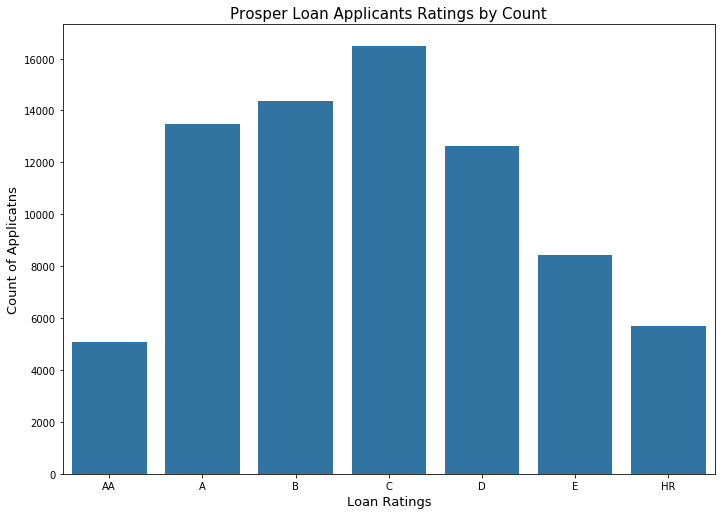

In [307]:
plt.figure(figsize = (11.69,8.27))
sb.countplot(data = df_loan, x = 'prosper_alpha_rating', color = bar_color);
plt.title('Prosper Loan Applicants Ratings by Count', fontsize=15)
plt.xlabel('Loan Ratings',fontsize=13)
plt.ylabel('Count of Applicatns' ,fontsize=13)
plt.savefig(fname='visuals/loan_ratings.png', format='png')
plt.show()

### Applicants Income Range 

> This helps us understand what income range most of our customers fall into

> Just like the previous chart, it helps answer questions about the security of underwritten debt generally

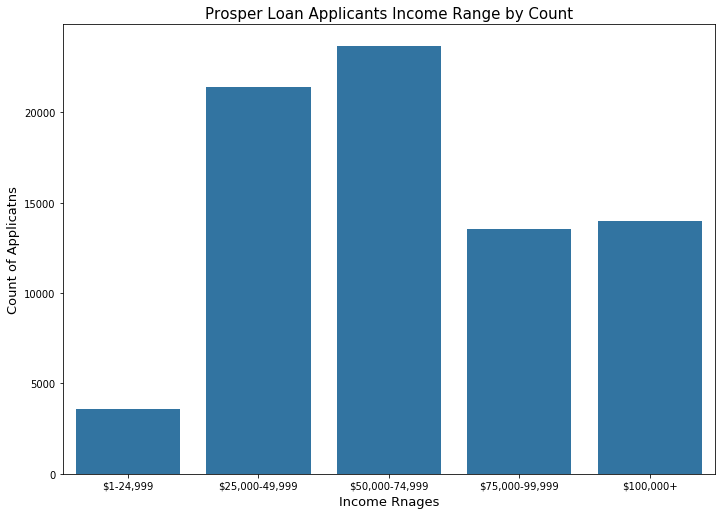

In [308]:
plt.figure(figsize = (11.69,8.27)) 
sb.countplot(data = df_loan, x = 'income_range', color = bar_color);
plt.title('Prosper Loan Applicants Income Range by Count', fontsize=15)
plt.xlabel('Income Rnages',fontsize=13)
plt.ylabel('Count of Applicatns' ,fontsize=13)
plt.savefig(fname='visuals/income_ranges.png', format='png')
plt.show()

###  Debt Application Listing category

> This helps us understnd the popular purpose(s) for which our borrowers are making loan request

>> From the chart below, we can deduce that majority of the loan requested for are for the purpose of servicing existing loans `Debt Reconsolidation`


In [309]:
list_cat = numeric_loan.listing_category_numeric.value_counts()
list_cat

1     48604
7      8280
2      6328
3      3644
6      2032
13     1767
15     1382
14      795
18      783
20      729
19      712
16      289
11      201
5       201
8       191
9        83
10       82
17       49
12       45
0        19
Name: listing_category_numeric, dtype: int64

> Plot

>> We need to get the representinve string  valaues of the listing categories above

In [310]:
listing_labels = ['Not Available','Debt consolidation','Home improvement','Business','Personal loan','Student use','Auto',
                     'Other','Baby & Adoption','Boat','Cosmetic','Procedure','Engagement ring',
                     'Green loan','Household expenses','Large purchases','Medical/Dental','Motorcycle','RV','Taxes',
                     'Vacation','Wedding loan']

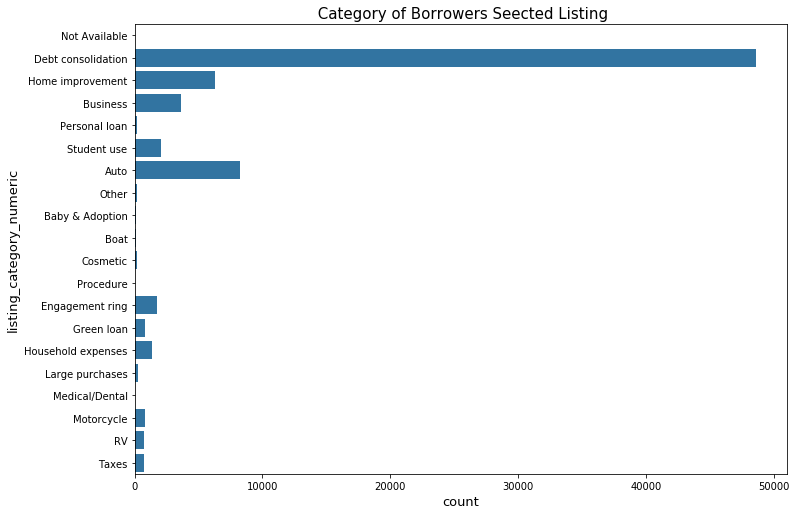

In [311]:
plt.figure(figsize = ( 11.69,8.27)) 
plt.title(" Category of Borrowers Seected Listing", fontsize=15)
plt.ylabel('Category of Listing',fontsize=13)
plt.xlabel('Count of Applicatns' ,fontsize=13)
ax = sb.countplot(data = df_loan, y = 'listing_category_numeric', color = bar_color,
             )
plt.savefig(fname='visuals/listing_category.png', format='png')
ax.set(yticklabels = listing_labels);

### One important question we might like to answer is the count of borrowers in our home oswers in our dataset

> This question provides a lof of financial insight into the exposure of the company

> It also helps us understand the ratio of secured loans to non-secured loans

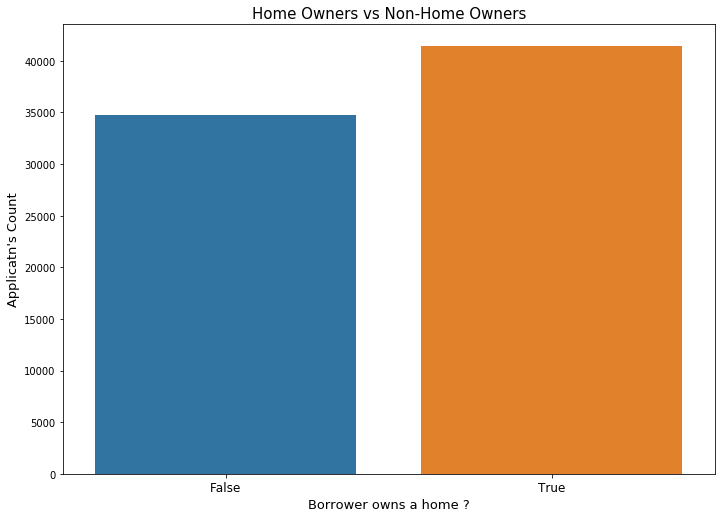

In [312]:
plt.subplots(figsize=( 11.69,8.27))
plt.title("Home Owners vs Non-Home Owners", fontsize=15)
sb.countplot(df_loan.is_borrower_homeowner)
plt.ylabel('Applicatn\'s Count',fontsize=13)
plt.xlabel('Borrower owns a home ?' ,fontsize=13)
plt.xticks(fontsize=12)
plt.savefig(fname='visuals/home_owners.png', format='png')
plt.show()

### Loan Status of Borrowers

> This chart helps us understand better what loan status majority of our bororwers fall in.
> This could further highlight whether we have a performing or non-performing loan book

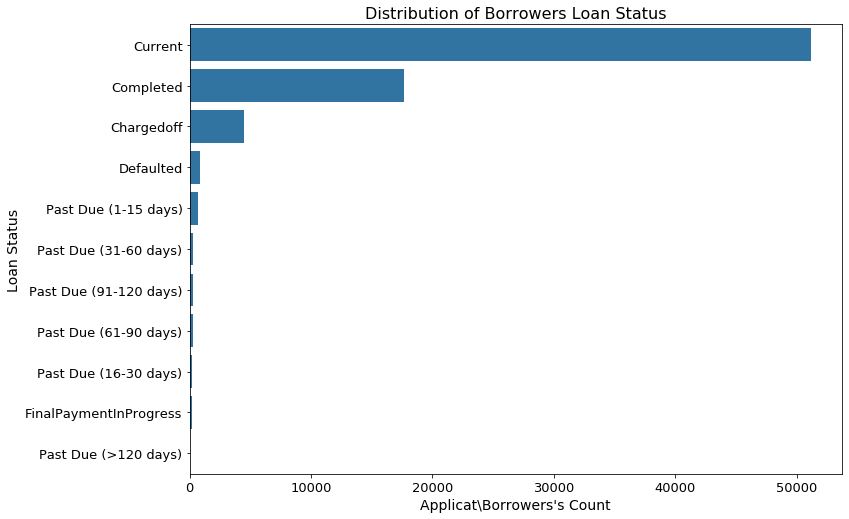

In [313]:
plt.figure(figsize = (11.69,8.27)) 
sb.countplot(data = df_loan, y = 'loan_status', color = bar_color,
             order = df_loan.loan_status.value_counts().index);
plt.title('Distribution of Borrowers Loan Status', fontsize=16)
plt.xlabel('Applicat\Borrowers\'s Count',fontsize=14)
plt.ylabel('Loan Status' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/loan_status.png', format='png')
plt.show()

###  Employment Status of Borrowers

>  This chart helps us understand better what category of employment most of our borrowers fall into

>  It answers questions such as:
>> Are majortiy of our borrowers employed or not?

>> Are they in full time jobs ot not? 

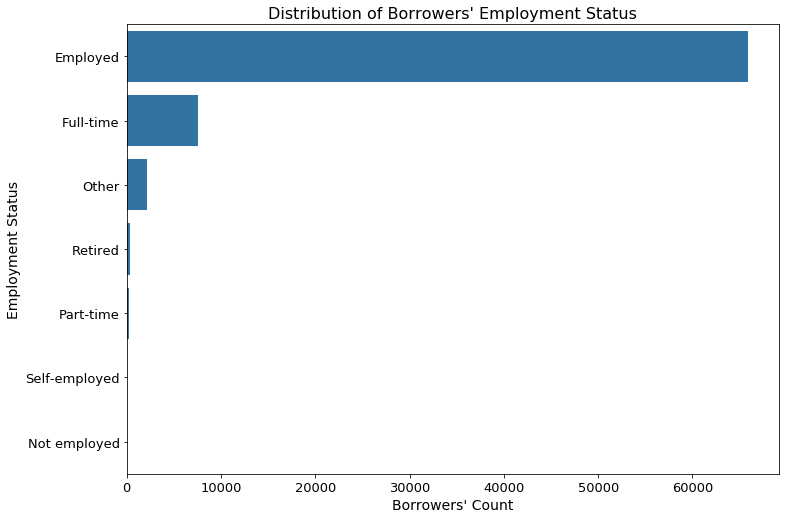

In [314]:
plt.figure(figsize = [ 11.69,8.27]) 
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = df_loan, y = 'employment_status', color = bar_color,
             order = df_loan.employment_status.value_counts().index);
plt.title('Distribution of Borrowers\' Employment Status', fontsize=16)
plt.xlabel('Borrowers\' Count',fontsize=14)
plt.ylabel('Employment Status' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/employment_status.png', format='png')
plt.show()

> PLot of Borrowers' Top 5 State

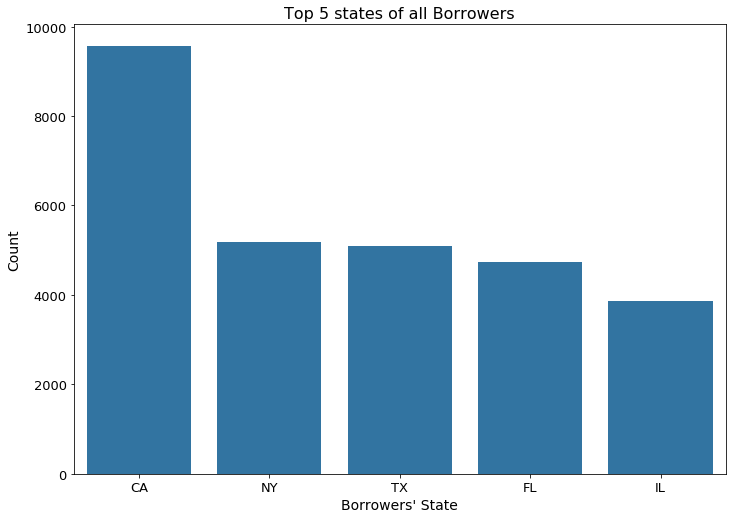

In [315]:
plt.figure(figsize = [ 11.69,8.27]) 
sb.countplot(data = df_loan, x = 'borrower_state', color = bar_color,
             order = df_loan.borrower_state.value_counts().head(5).index );
plt.title("Top 5 states of all Borrowers", fontsize=16)
plt.xlabel('Borrowers\' State',fontsize=14)
plt.ylabel('Count' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/borrowers_state.png', format='png')
plt.show()

> Plot top 10 Occupations of Borrowers

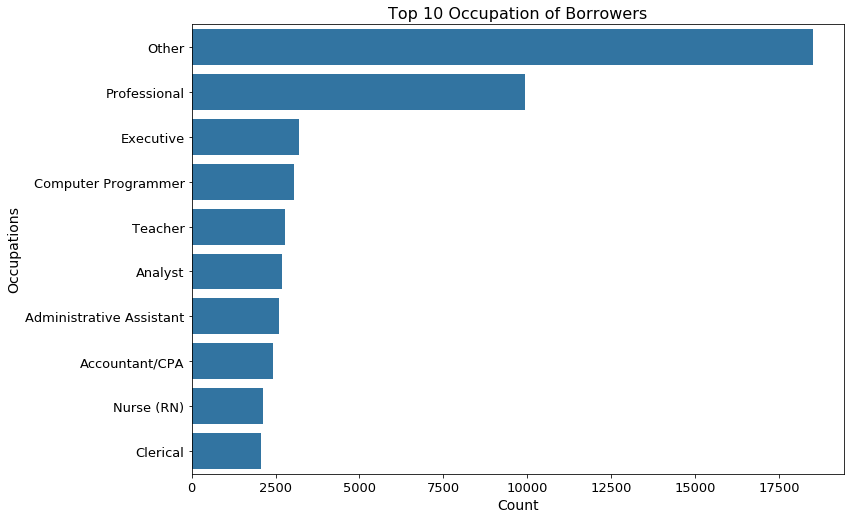

In [316]:
plt.figure(figsize = [ 11.69,8.27]) 
sb.countplot(data = df_loan, y = 'occupation', color = bar_color,
             order = df_loan.occupation.value_counts().head(10).index );
plt.title("Top 10 Occupation of Borrowers",fontsize=16)
plt.xlabel('Count',fontsize=14)
plt.ylabel('Occupations' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/borrowers_occupation.png', format='png')
plt.show()

###  Credit Score among Borrowers

> This chart helps us understand the distrbution of credit score among our borrowers

> It answers questions such as what credit score is most popular among our borrowers


`NB:` Note that these score are treated as categorical variables

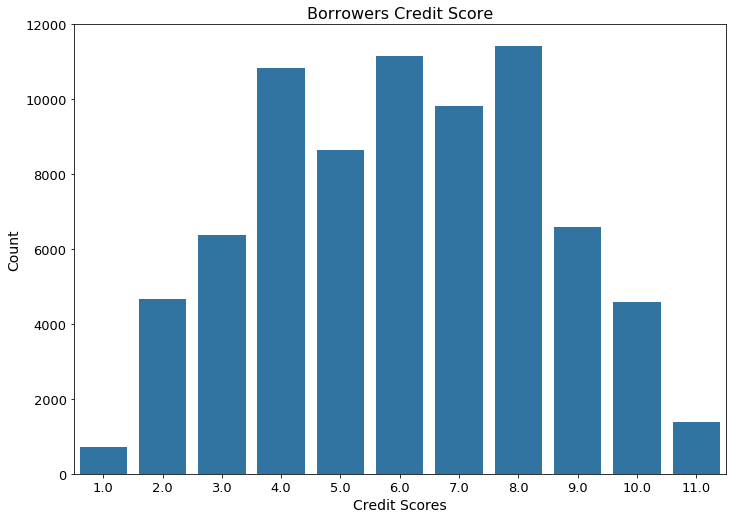

In [317]:
plt.figure(figsize = [ 11.69,8.27]) 
sb.countplot(data = df_loan, x = 'prosper_score', color = bar_color);
plt.title("Borrowers Credit Score", fontsize=16)
plt.xlabel('Credit Scores',fontsize=14)
plt.ylabel('Count' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/loan_credit_scores.png', format='png')
plt.show()

#### Key Insights & Summary of Univariate Analysis - Categorical

- most of the borrowers are employed into a job
- There are more current loan holders in the loan portfolio
- the largest percentage of borrowers have a prosper score rating of    8.0, 6.0 and 4.0
- most of the  borrowers do not have a known or reported occupation
- We have more borrowers from  CA(California) and NY(New York)
- borrowers who earn around `$25,000` are few while most of the borrowers earn between`$_50,000` `$74,999`
- most of th borrowers are home owners

#### Plotting Visuals for Quantitative Varibales

### Loan Rate Distribution among Borrowes

> This chart helps us understand the distribution of loan rates among our borrowers

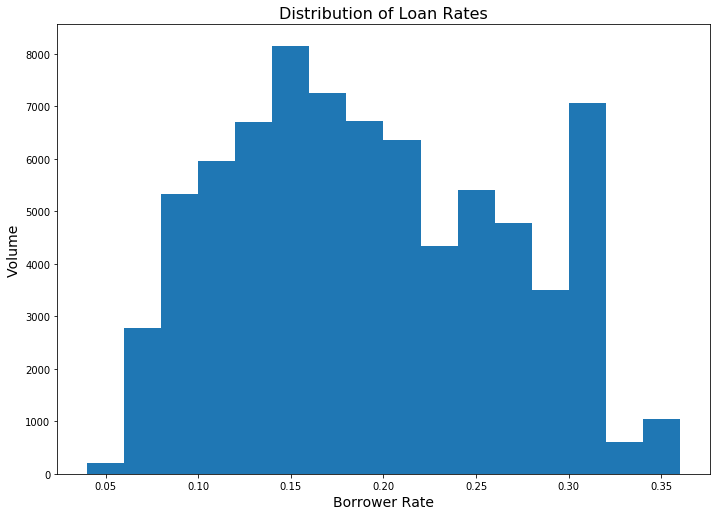

In [318]:
plt.figure(figsize=[ 11.69,8.27])
bin_edges = np.arange(df_loan.borrower_rate.min(), df_loan.borrower_rate.max()+.02,0.02)
plt.hist(data = df_loan, x = 'borrower_rate',bins=bin_edges);
plt.title("Distribution of Loan Rates", fontsize=16)
plt.xlabel('Borrower Rate',fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.savefig(fname='visuals/loa_rate_distro.png', format='png')
plt.show()

### Duration of EMployment Status


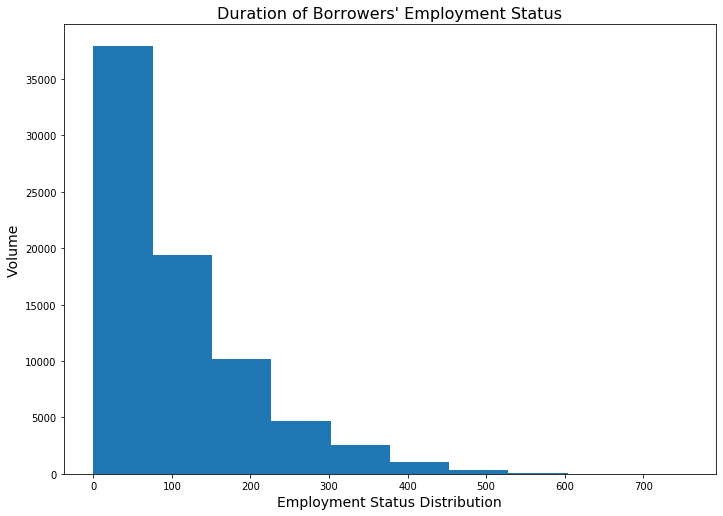

In [319]:
plt.figure(figsize=[ 11.69,8.27])
plt.hist(data = df_loan, x = 'employment_status_duration');
plt.xlabel('Employment Status Duration');
plt.ylabel('Count');
plt.title("Duration of Borrowers\' Employment Status", fontsize=16);
plt.xlabel('Employment Status Distribution',fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.savefig(fname='visuals/employ_status_distro.png', format='png')
plt.show()

### Distribution of Borrowers Monthly Income

> This plot helps us understand the distribution of borrowers monthly income

> It answers questions such as 

>> Are majority of our labourers earn above averge income of all borrowers

> From the chart below the distribution is right skewed indictaitng the mean is less than the median 
>> This means that there are more borrowers who earn less than the average income of all borrowers combines

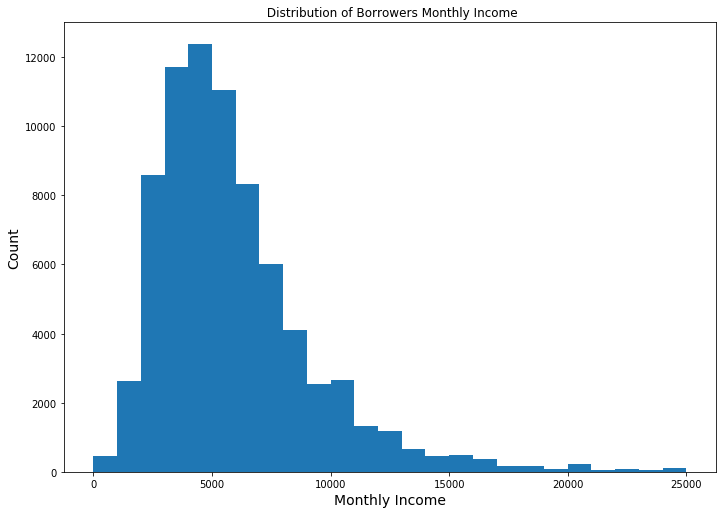

In [320]:
low_income = df_loan[df_loan['stated_monthly_income'] <= 25000]
bin_edges = np.arange(0, low_income.stated_monthly_income.max()+1000, 1000)
plt.figure(figsize=[ 11.69,8.27])
plt.hist(data = df_loan, x = 'stated_monthly_income', bins = bin_edges);
plt.xlabel('Monthly Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title(" Distribution of Borrowers Monthly Income")
plt.savefig(fname='visuals/borrowers_monthly_distro.png', format='png')
plt.show()

###  Distribution of  Original Loan Amount

> This chart helps us understand the distribution of borrowers originally requested loan amount

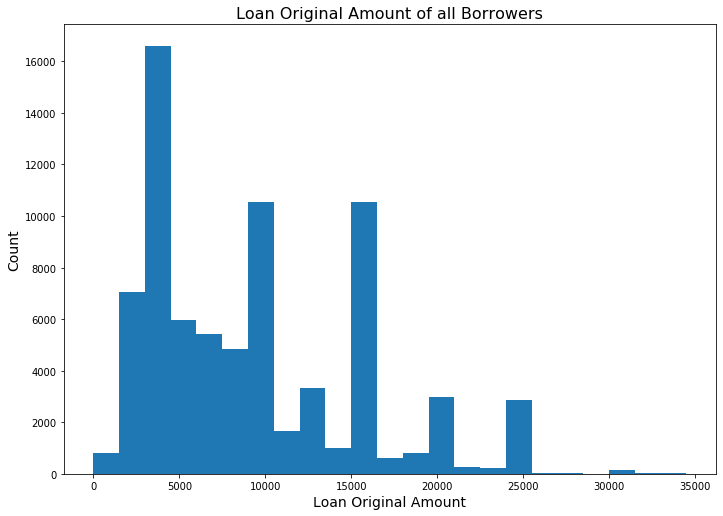

In [321]:
bin_edges = np.arange(0, df_loan.loan_original_amount.max()+1000, 1500)
plt.figure(figsize=[ 11.69,8.27])
plt.hist(data =df_loan, x = 'loan_original_amount', bins = bin_edges)
plt.xlabel('Loan Original Amount', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Loan Original Amount of all Borrowers", fontsize=16)
plt.savefig(fname='visuals/loan_amount_distro.png', format='png')
plt.show()

Plot of Distribution of Investors

In [322]:
df_loan.investors.describe()

count    76216.000000
mean        69.998517
std         97.801415
min          1.000000
25%          1.000000
50%         32.000000
75%        100.000000
max       1189.000000
Name: investors, dtype: float64

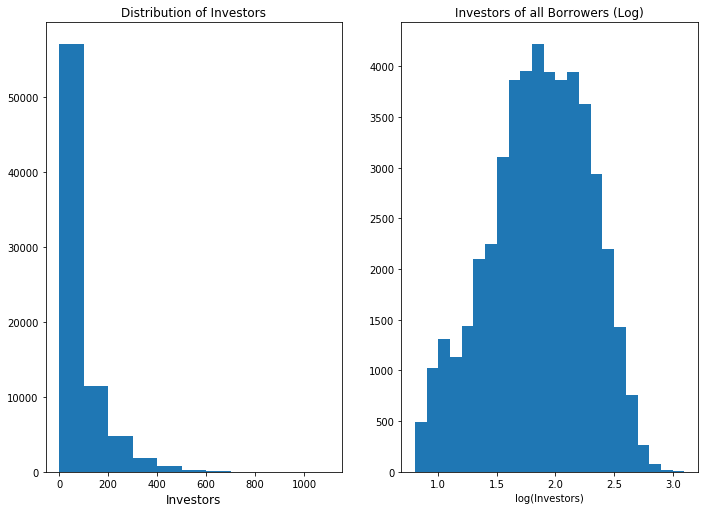

In [323]:

plt.figure(figsize = [ 11.69,8.27])

# left histogram is  plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df_loan.investors.max()+10, 100)
plt.hist(data = df_loan, x = 'investors', bins = bin_edges)
plt.xlabel('Investors', fontsize=12)
plt.title("Distribution of Investors");

# right histogram is plotted after direct log transformation
plt.subplot(1, 2, 2)
# plt.subplot(1, 2, 2)
log_data = np.log10(df_loan.investors) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");
plt.savefig(fname='visuals/investors.png', format='png')
df_loan['investors_log'] = np.log10(df_loan.investors)

### Key Insights & Summary of Univariate Analysis - Numerical

#####  Loan_original_amount:
> -  the distribution of the loan origin amount was massively skewed to the right. with its highest peak between 4000-5000 USD
##### Stated_monthly_income: 
> - The chart was right-skewed ondicating that most of the borrowers realtively are low income earners, significantly, they earn aroundn $100
#### borrower_rate: 
> -   This distribution is unimodal with its mode around        
15 - 16%


<a id= 'bi'></a>

## Bivariate Exploration

> In this section,I would be investigating relationships between pairs of variables in our
  data
  
> In this section, I would be taking my amalysis further by trying to understad anf visalizse the relationships between two different varibles and how this affects the outomce of a loan application

> Let us start by pLotting the correlation between among all our numeric variables

In [324]:
numeric_loan.corr()

,estimated_effective_yield,borrower_a_p_r,borrower_rate,prosper_numeric_rating,prosper_score,listing_category_numeric,employment_status_duration,stated_monthly_income,monthly_loan_payment,recommendations,debt_to_income_ratio,loan_original_amount,percent_funded,investors
estimated_effective_yield,1.000000,0.901118,0.900550,-0.855330,-0.643770,0.105553,-0.011521,-0.135050,-0.253730,-0.046152,0.128576,-0.325863,-0.037511,-0.275325
borrower_a_p_r,0.901118,1.000000,0.993423,-0.962509,-0.675986,0.105126,-0.024559,-0.157873,-0.318303,-0.012437,0.128925,-0.419452,-0.018218,-0.272977
borrower_rate,0.900550,0.993423,1.000000,-0.953535,-0.658320,0.099626,-0.024511,-0.156327,-0.327766,-0.009918,0.126664,-0.406860,-0.024070,-0.250044
prosper_numeric_rating,-0.855330,-0.962509,-0.953535,1.000000,0.711403,-0.090825,0.022553,0.160684,0.325014,0.005585,-0.135045,0.420734,0.007148,0.315670
prosper_score,-0.643770,-0.675986,-0.658320,0.711403,1.000000,-0.010014,-0.011231,0.153254,0.174995,0.027790,-0.145160,0.261788,-0.022125,0.322177
listing_category_numeric,0.105553,0.105126,0.099626,-0.090825,-0.010014,1.000000,-0.035075,-0.022433,-0.190985,0.000544,-0.040891,-0.205904,0.000116,-0.047346
employment_status_duration,-0.011521,-0.024559,-0.024511,0.022553,-0.011231,-0.035075,1.000000,0.064777,0.051922,-0.004436,0.012631,0.067834,0.004165,-0.021868
stated_monthly_income,-0.135050,-0.157873,-0.156327,0.160684,0.153254,-0.022433,0.064777,1.000000,0.296397,-0.002793,-0.140016,0.297821,-0.022844,0.119387
monthly_loan_payment,-0.253730,-0.318303,-0.327766,0.325014,0.174995,-0.190985,0.051922,0.296397,1.000000,-0.023510,0.000630,0.917267,-0.002312,0.305466
recommendations,-0.046152,-0.012437,-0.009918,0.005585,0.027790,0.000544,-0.004436,-0.002793,-0.023510,1.000000,-0.005630,-0.027016,0.004575,0.033610


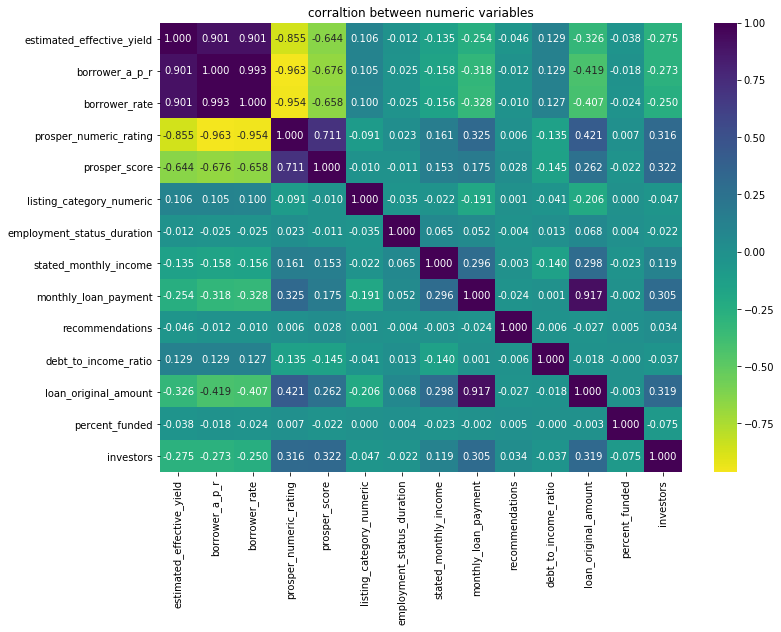

In [325]:
plt.figure(figsize = [11.69,8.27])
sb.heatmap(numeric_loan.corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('corraltion between numeric variables')
plt.savefig(fname='visuals/heatmap_all_numeric_varibles.png', format='png')
plt.show()

## Numeric Vs Categorical Relationships

### Employment Status Vs Ratings and thier effect on Loan Amount

> This chart helps understand the effect of the interaction between employment status and thier effect on approved loan amount

<Figure size 841.68x595.44 with 0 Axes>

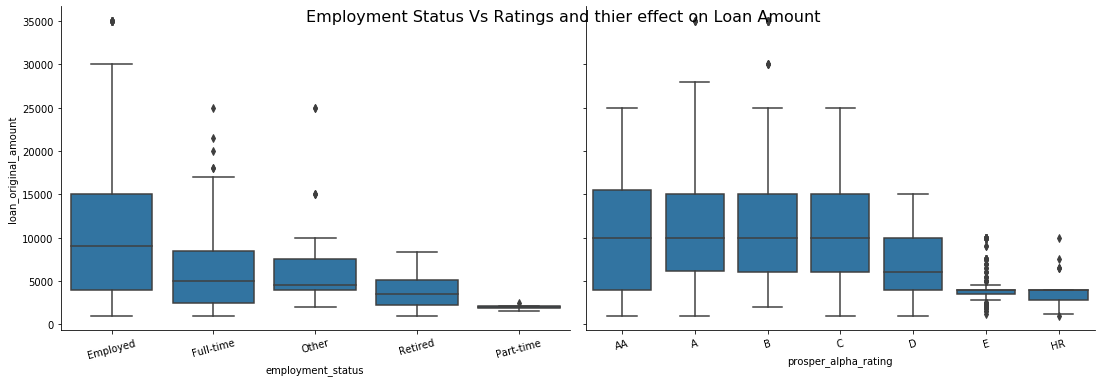

In [326]:
cols_vars = ['employment_status', 'prosper_alpha_rating']
samples = df_loan.sample(2000, replace = False)

def boxgrid(x, y, **kwargs):

#    plt.figure(figsize = [20, 12])

    default_color = bar_color
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [ 11.69,8.27])
g = sb.PairGrid(data = samples, y_vars = [ 'loan_original_amount'], 
                x_vars = cols_vars, size = 5, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.suptitle('Employment Status Vs Ratings and thier effect on Loan Amount', fontsize=16)
plt.savefig(fname='visuals/employ_status_vs_ratings.png', format='png')
plt.show();

#### Income range effect on loan amount

> These chart helps us understand how high or low income ranges affects approved loan amount of borrowers 

>> The charts below shows us that higher income ranges is likely to lead to increase approved loan amounts

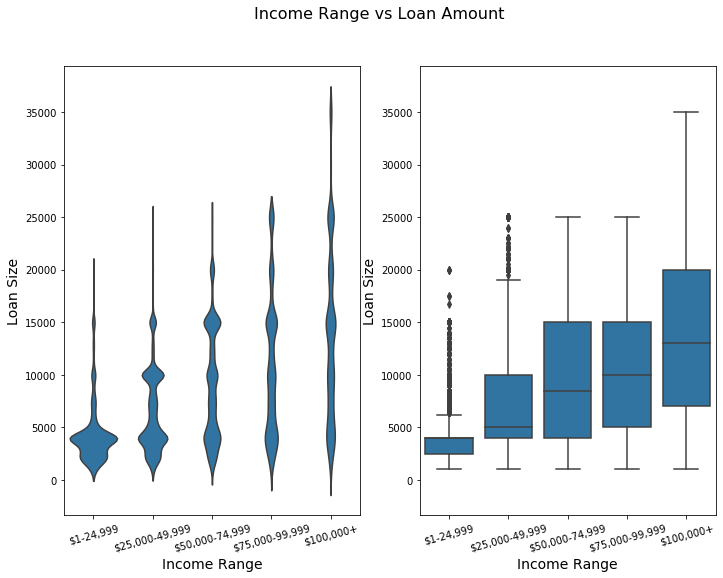

In [327]:
plt.figure(figsize = [11.69,8.27])

# violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_loan, x = 'income_range', y = 'loan_original_amount', color = bar_color,inner=None)
plt.xticks(rotation = 15);
plt.ylabel('Loan Size', fontsize=14)
plt.xlabel('Income Range', fontsize=14)

# box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_loan, x = 'income_range', y = 'loan_original_amount', color = bar_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.ylabel('Loan Size', fontsize=14)
plt.xlabel('Income Range', fontsize=14)
plt.suptitle('Income Range vs Loan Amount', fontsize=16)
plt.savefig(fname='visuals/inceom_range_loan_size.png', format='png')

### Categorical Vs Categorical Relationshsips

#### Loan Status Vs. Employment Status

> The chart below helps us understand how emplyment status affects loan status
>> Our observations about this are made after the chart below

>> Group employment status by loan status

In [328]:
employ_loan_status = df_loan.groupby(['employment_status', 'loan_status']).size()
employ_loan_status = employ_loan_status.reset_index(name = 'count')
employ_loan_status = employ_loan_status.pivot(index = 'loan_status', columns = 'employment_status', values = 'count')
employ_loan_status

employment_status,Employed,Full-time,Not employed,Other,Part-time,Retired,Self-employed
loan_status,,,,,,,
Chargedoff,3283.0,828.0,NaN,252.0,31.0,50.0,NaN
Completed,11844.0,5187.0,1.0,343.0,139.0,172.0,1.0
Current,48315.0,1254.0,NaN,1463.0,19.0,78.0,41.0
Defaulted,596.0,228.0,NaN,43.0,4.0,14.0,NaN
FinalPaymentInProgress,171.0,10.0,NaN,6.0,NaN,NaN,NaN
Past Due (1-15 days),655.0,27.0,NaN,30.0,NaN,2.0,NaN
Past Due (16-30 days),223.0,7.0,NaN,10.0,1.0,NaN,NaN
Past Due (31-60 days),285.0,13.0,NaN,20.0,2.0,2.0,NaN
Past Due (61-90 days),251.0,11.0,NaN,11.0,1.0,1.0,NaN


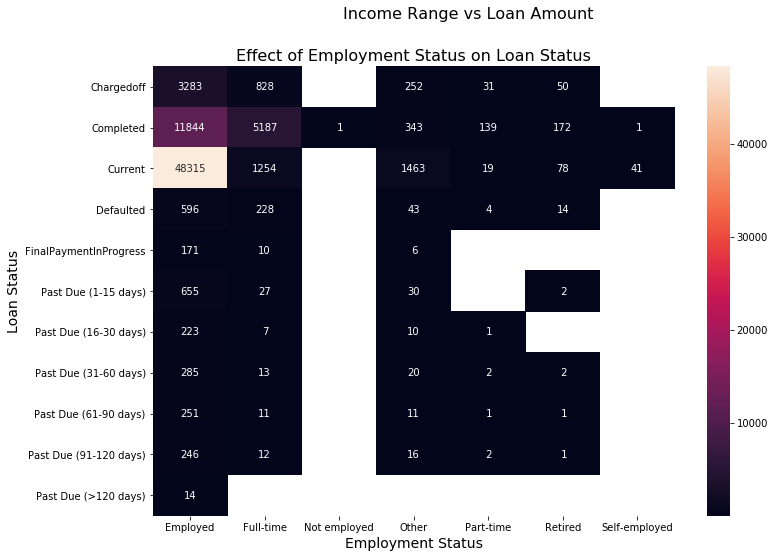

In [329]:
plt.figure(figsize = [11.69,8.27])
sb.heatmap(employ_loan_status, annot = True,fmt='2g');
plt.title('Effect of Employment Status on Loan Status', fontsize=16)
plt.ylabel('Loan Status', fontsize=14)
plt.xlabel('Employment Status', fontsize=14)
plt.suptitle('Income Range vs Loan Amount', fontsize=16)
plt.savefig(fname='visuals/loan_vs_employ_status.png', format='png')
plt.show()

> #### Observation

>> Majority of applicatns who have current & completed loans, falls under the Employed & Full-time Employment Status

####  Home Ownership Status and Loan Status

> In this chart, we want to explore the relationship between Borrowers' Home Ownership status and Loan Status

>>Our observations about this are made after the chart below

>> Group Home Ownership by Loan Status

In [330]:
home_loan_status = df_loan.groupby(['is_borrower_homeowner', 'loan_status']).size()
home_loan_status = home_loan_status.reset_index(name = 'count')
home_loan_status = home_loan_status.pivot(index = 'loan_status', columns = 'is_borrower_homeowner', values = 'count')
home_loan_status

is_borrower_homeowner,False,True
loan_status,,
Chargedoff,2301,2143
Completed,8027,9660
Current,23047,28123
Defaulted,392,493
FinalPaymentInProgress,84,103
Past Due (1-15 days),364,350
Past Due (16-30 days),122,119
Past Due (31-60 days),154,168
Past Due (61-90 days),111,164


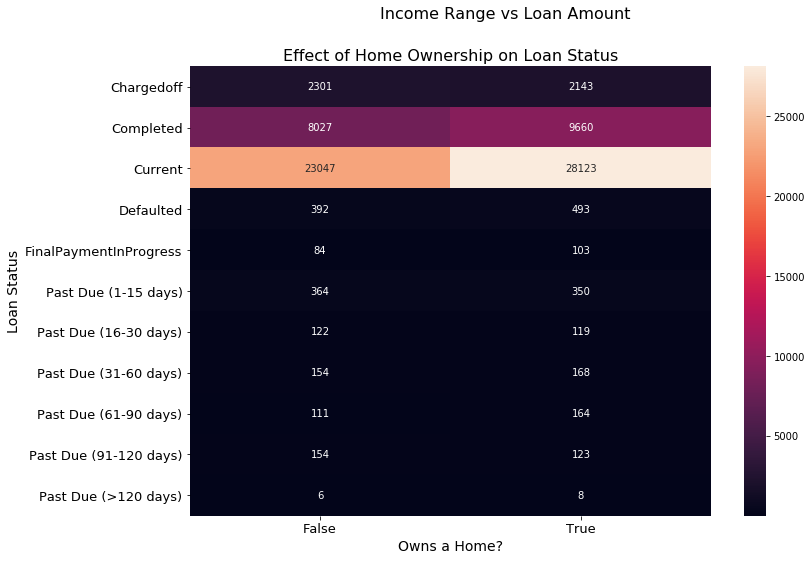

In [331]:
plt.figure(figsize = [ 11.69,8.27])
sb.heatmap(home_loan_status, annot = True, fmt = 'd');
plt.title('Effect of Home Ownership on Loan Status', fontsize=16)
plt.ylabel('Loan Status', fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel('Owns a Home?', fontsize=14)
plt.xticks(fontsize=13)
plt.suptitle('Income Range vs Loan Amount', fontsize=16)
plt.savefig(fname='visuals/loan_vs_home_status.png', format='png')
plt.show()

> ### Observation

>> Majority of borrowers in Comlpeted or Current Loan Status owns a home

#### We need to understand how the following varibles affect the outcome of a loan appllication:

- Emplloyment Status

- Credit Rating (Alpha Rating)

- Loan Status

- Income Range


> Our goal is to observe how these variables interact with one anoher in predicting the outocme of a loan application

>> Qurty datasets where monthly income less than $10,000 and borrowers are employed 

In [332]:
df_loan_less = df_loan[(df_loan['stated_monthly_income'] <= 10000) ]
df_loan_less = df_loan_less[df_loan_less['income_range'] != 'Not employed']
col_vars = ['employment_status', 'prosper_rating_alpha', 'income_range','loan_status']

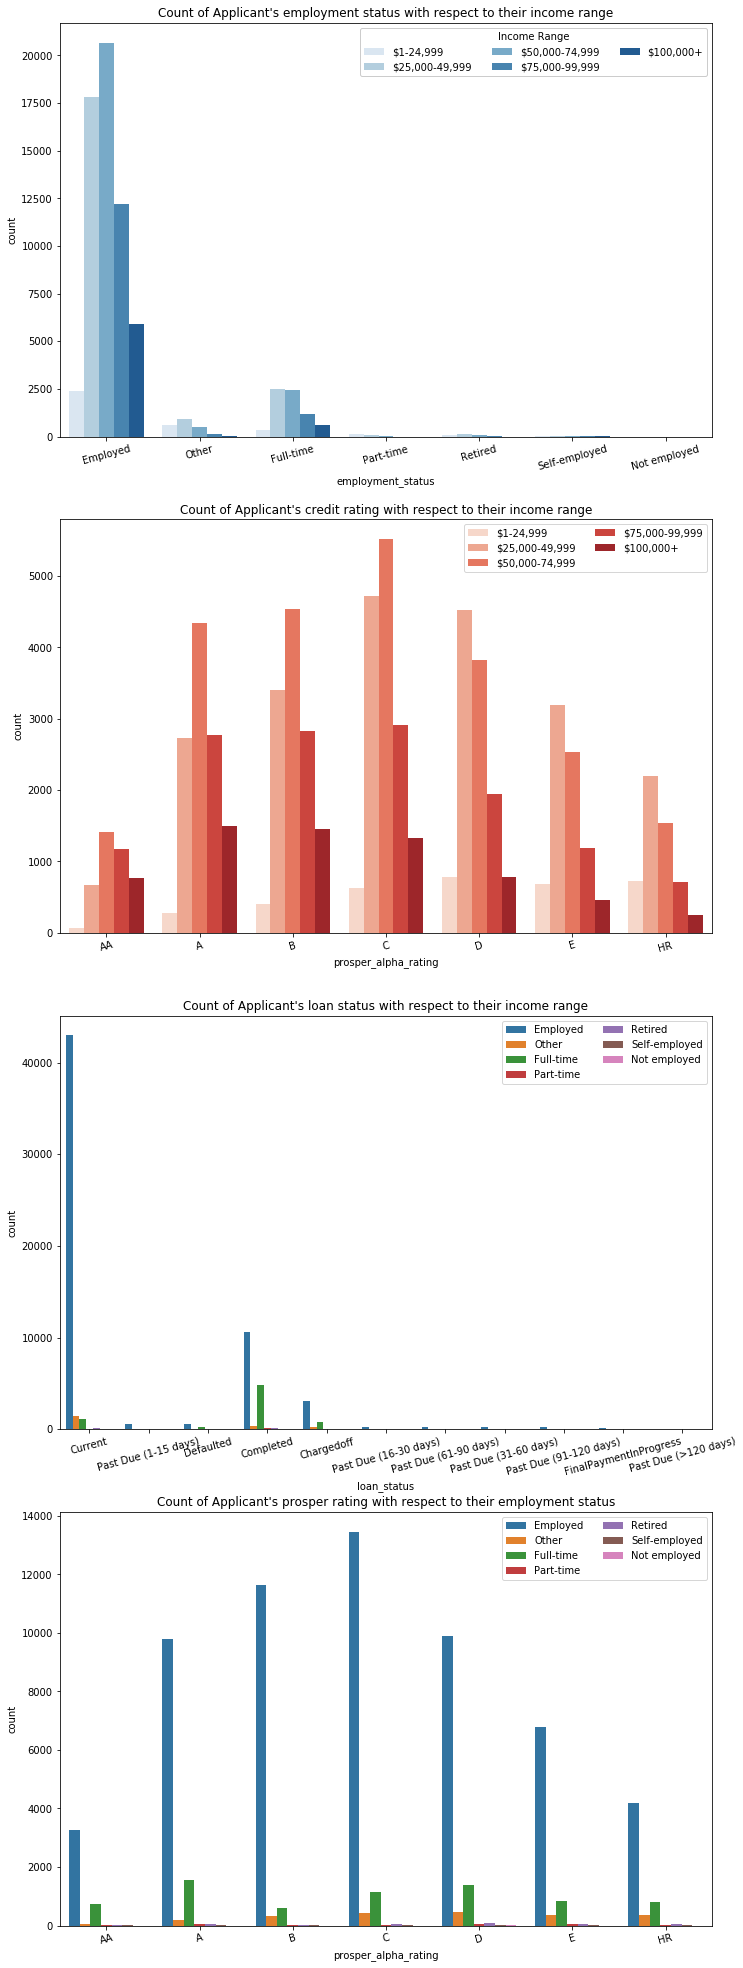

In [343]:
plt.figure(figsize = [11.69, 35]) 

# plot A: employment status vs income range
ax1= plt.subplot(4, 1, 1)
ax1 = sb.countplot(data = df_loan_less, x = 'employment_status', hue = 'income_range', palette = 'Blues')
plt.xticks(rotation = 15)
ax1.legend(loc = 1, ncol = 3, framealpha = 1, title= 'Income Range')
plt.title("Count of Applicant's employment status with respect to their income range")

# plot B: prosper rating vs. income range
ax2 = plt.subplot(4, 1, 2)
ax2 = sb.countplot(data = df_loan_less, x = 'prosper_alpha_rating', hue = 'income_range', palette = 'Reds')
ax2.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)
plt.title("Count of Applicant's credit rating with respect to their income range")


# plot C: loan status vs. employment status, use different color palette
ax3 = plt.subplot(4, 1, 3)
ax3 = sb.countplot(data = df_loan_less, x = 'loan_status', hue = 'employment_status')
ax3.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)
plt.title("Count of Applicant's loan status with respect to their income range")

# plot D: prosper rating vs. employment status
ax4 = plt.subplot(4, 1, 4)
ax4 = sb.countplot(data = df_loan_less, x = 'prosper_alpha_rating', hue = 'employment_status')
ax4.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);
plt.title("Count of Applicant's prosper rating with respect to their employment status")
plt.savefig(fname='visuals/multiple_bivariate.png', format='png')
plt.show()

### Key Insights & Summary of Findings from Bivariate Analysis

- Not only are there more positive outcome of loan application by employed borrowers, borrowers with AA rating are also fully employed
- A large chunkc of the employed borrowers earn between 50K USD
- Most of the Borrowers with Completed Loan Status are employed Borrowers
- Individuals that earn above $100K have the highest median loan orginal amount

<a id= 'multi'></a>

### Multivariate Exploration

> In this section, we would be creating plots of three or more variables to investigate our data even
further

A. Plot Numerical & Categorical Varibles Relatioinship

#### Effect Income Range & Credit Rating on Loan Original Amount

> We want to understand the effect of the Interaction of Income Ranges and Credit Rating on Loan Original Amount

> What informs borrowers decsion on the amount of loan to ask for. Are these factors useful at predictiong such

>> We would be plotting our charts based on the first three catgories of credit rrating

In [334]:
df_loan_less2 = df_loan_less.loc[df_loan_less['prosper_alpha_rating'].isin(['AA', 'A','B'])]

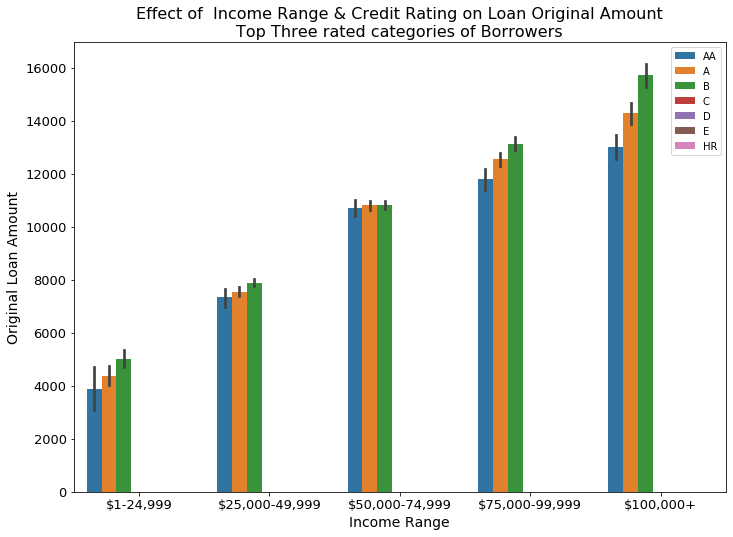

In [344]:
plt.figure(figsize = [ 11.69,8.27])

ax = sb.barplot(data = df_loan_less2, x = 'income_range', y = 'loan_original_amount', hue = 'prosper_alpha_rating')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'prosper_rating_alpha')
plt.title('Effect of  Income Range & Credit Rating on Loan Original Amount\nTop Three rated categories of Borrowers', fontsize=16)
plt.ylabel('Original Loan Amount', fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel('Income Range', fontsize=14)
plt.xticks(fontsize=13)
plt.legend(loc=1)
plt.savefig(fname='visuals/income_vs_amount_top3rated.png', format='png')
plt.show()

#### Effect of owning a home and high monthly income on Loan Amount

> This helps us understand how been a home owner and borrowers monthly income affect their loan amount 

<Figure size 841.68x595.44 with 0 Axes>

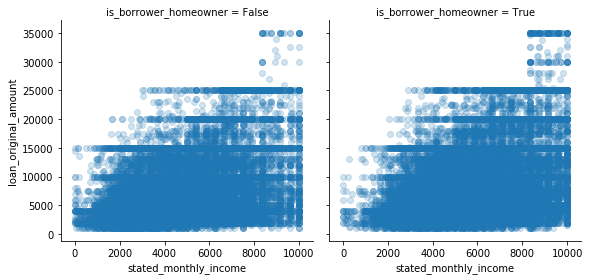

In [345]:
plt.figure(figsize=[ 11.69,8.27])
g = sb.FacetGrid(data = df_loan_less, col= 'is_borrower_homeowner', size = 4,
                 col_wrap = 3)
g.map(sb.regplot, 'stated_monthly_income', 'loan_original_amount', y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/5})

# plt.suptitle('Effect of owning a home and high monthly income on Loan Amount', fontsize=16)
# plt.ylabel('Original Loan Amount', fontsize=14)
# plt.yticks(fontsize=13)
# plt.xlabel('Monthly Income', fontsize=14)
# plt.xticks(fontsize=13)
plt.savefig(fname='visuals/home_vs_income_loanAmonunt.png', format='png')
plt.show()

#### Plot Effect of Having a home & Employment Status on Loan Amount

>> Do these features cause an increase in Loan Amount

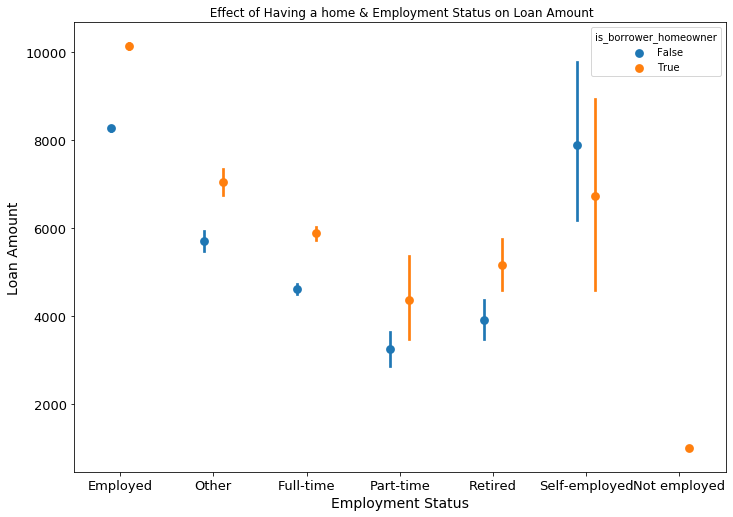

In [346]:
plt.figure(figsize = [ 11.69,8.27])
ax = sb.pointplot(data = df_loan_less, x = 'employment_status', y = 'loan_original_amount', hue = 'is_borrower_homeowner',
                  dodge = 0.2, linestyles = "");
plt.title(' Effect of Having a home & Employment Status on Loan Amount')
plt.xlabel('Employment Status', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Loan Amount', fontsize=14)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/home_vs_employment_loanAmonunt.png', format='png')
plt.show()

#### Effect of having a home and high credit rating on borrower's Loan Insterest Rate

>> Do these features cause an increase in Loan Amount

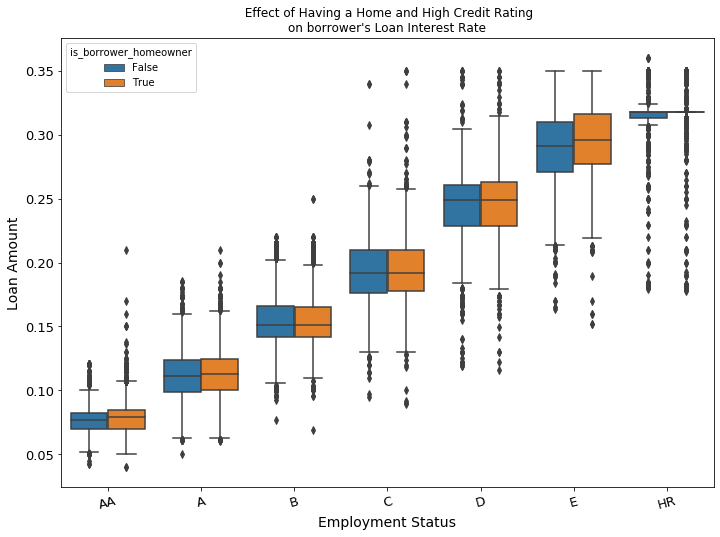

In [347]:
plt.figure(figsize=[ 11.69,8.27])
sb.boxplot(data = df_loan_less, x = 'prosper_alpha_rating', y = 'borrower_rate',hue='is_borrower_homeowner')
plt.xticks(rotation = 15)
plt.title(' Effect of Having a Home and High Credit Rating\non borrower\'s Loan Interest Rate')
plt.xlabel('Employment Status', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Loan Amount', fontsize=14)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/home_vs_creditRating_loanAmonunt.png', format='png')
plt.show()

### Key Insights and Summary of Multivariate Analysis

- Borrowers with High MOnthly Income fall anyhwere between AA and B credit Rating and attract higher loan Amount
- The Loan Book is composed more of borrowers with high monthly incoem, home owners. They also attract higher loan amount thatn the rest

<a id= 'insights'></a>

### General Summary & Insights

- Most Borrowers who are employed earn around 50k USD & above

- Borrowers with high credit rating (AA, A B) have higher chances of getting a loan than borrowers who do not

- Distribution of Monthly Income is right-skewed indicating a larger participation in borrowing by people with below avergae or averae monthly income

- Home Ownership and Gainful Employment serves as useful factors in predicting a successful loan application status

- Home Onership and Gainful Employment are also useful predictors of loan interrest rate. Borrowers who satisfy these features tend to attract lower interest rate than thsoe who do not. This is not surprsing as higher risk attracts higher interest rate.


<a id= 'conclude'></a>

### Conclusion & Limitations

One Limitation of this Exploratory Data Analysis is there are no delibeberte statistical analysis.
The objective of the project lats more emphasis on the visualization aspect.

Statistical Analysis like Linear/logistic Regression woudl prove a value addition to the project but is quite beyond the scope of this project. 


In conclusion, based on the various visualizations made in this notebook, factors for predicting succesful laon application include:

- Borrower's Home Ownership
- Borrower's Employment Status
- Borrower's Monthly Income
- Borrower's prosper (credit) rating

>  export the notebook as an
html file from the `File > Download as... > HTML` menu. 
<!-- Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report! -->

In [339]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

<a href= '#top'> Go to the Top</a>